# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2020/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday September 29th, 2020 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via http://peergrade.io/

(If you haven't set up an account on peergrade yet, go to www.peergrade.io/join and type in the class code: SRJCH2.)

# Part 1: Binning degree distributions


* Binning real numbers
  * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
  * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
  * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.

**Binning real numbers**

[  34  169  488  928 1250 1107  679  260   72   13] [1.62443929 1.70447931 1.78451933 1.86455936 1.94459938 2.0246394
 2.10467943 2.18471945 2.26475947 2.3447995  2.42483952]


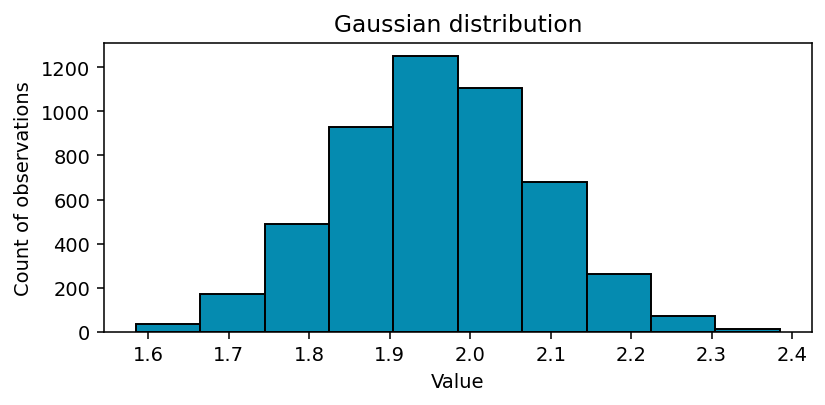

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import networkx as nx


plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['figure.dpi'] = 140

# Create data points from a Gaussian distribution
mu = 2
sigma = 0.125
population = list()

for i in range(5000):
  population.append(random.gauss(mu, sigma))

# Bin the data points
bins = 10
hist, bins_plot = np.histogram(population, bins)
print(hist, bins_plot)

# Plot the binned data
plt.title("Gaussian distribution")
plt.ylabel("Count of observations")
plt.xlabel("Value")
plt.bar(bins_plot[:-1], hist, width=(bins_plot[1]-bins_plot[0]), color="#058bb0", edgecolor="#000000")
plt.tight_layout()
plt.show()

**Figure 1.** Gaussian distribution with mu=2 and sigma=0.125 for 5000 data points

<i><font color='#00008B'>  
The counts-array and bin-array have different lengths since the first one stores the amount of observations within each bin, while the bin-array stores the boundaries of the bins.
</font></i>  

* Binning integers
  * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
  * Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.
  * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution

**Binning integers**

Poisson distribution min and max:
2 23
Binning vector v:
[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19.
 20. 21. 22. 23. 24.] 23
Histogram and bins:
[  7  38  87 183 288 479 550 629 625 573 473 376 257 177 108  76  37  17
  10   5   3   2] [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19.
 20. 21. 22. 23. 24.] 22 23
Sumn over bin counts:
299.0


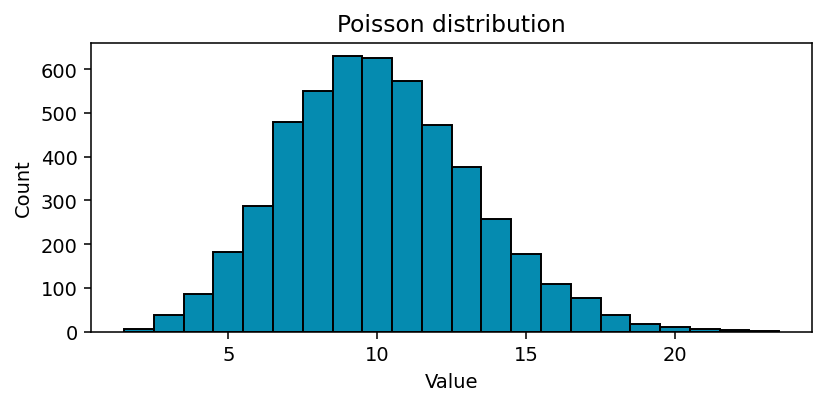

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import networkx as nx


plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['figure.dpi'] = 140

# Create data points from a Gaussian distribution
l = 10
s = 5000

population = np.random.poisson(lam=l, size=s)
# Find the minimum and maximum
min_pop = min(population)
max_pop = max(population)
print("Poisson distribution min and max:")
print(min_pop, max_pop)

# Bin manually the data points using a vector
bins = max_pop - min_pop + 1

v = np.linspace(min_pop, max_pop, bins)
v = np.append(v, max_pop+1)
print("Binning vector v:")
print(v, len(v))

hist, bins_plot = np.histogram(population, bins=v)
print("Histogram and bins:")
print(hist, bins_plot, len(hist), len(bins_plot))

print("Sumn over bin counts:")
print(np.sum(bins_plot))

# Plot the binned data
plt.title("Poisson distribution")
plt.ylabel("Count")
plt.xlabel("Value")
plt.bar(bins_plot[:-1], hist, width=1.0, color="#058bb0", edgecolor="#000000")
plt.tight_layout()
plt.show()

**Figure 2.** Poisson distribution with lambda=10 for 5000 data points

What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.
<i><font color='#00008B'>  
The sum over the bin counts is equal to the population generated with the Poisson distribution.  

The first element of the binning vector corresponds to the min of the Poisson distribution. However, the last element of the binning vector corresponds to the max of the Poisson distribution plus 1, since it is the closing boundary for the last bin.
</font></i>  

* Binning and plotting degree distributions. 
  * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$?  

    * **Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.  

  * Now, use `networkx` to create the graph and extract the degree distribution.
  * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

**Binning and plotting degree distributions**

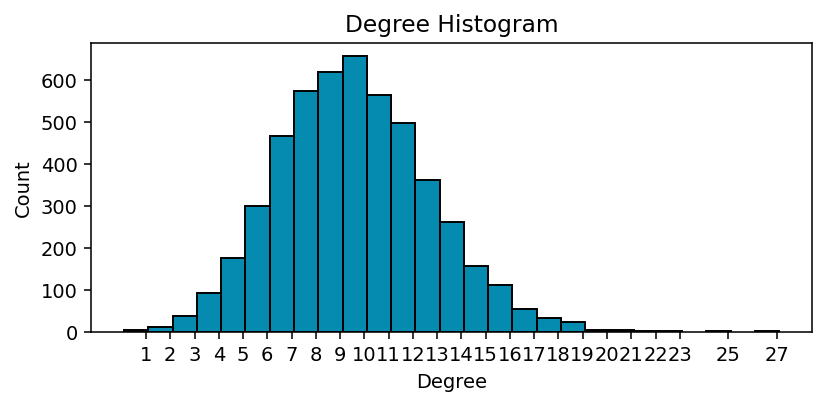

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import collections


plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['figure.dpi'] = 140

# Find values of the Erdos-Renyi network
n = 5000
k = 10
p = k/(n-1)

# Generate the Erdos-Renyi network
G = nx.erdos_renyi_graph(n, p, seed=None, directed=False)

# Extract the network degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

# Plot degree distribution
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=1, color="#058bb0", edgecolor="#000000")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
plt.tight_layout()
plt.show()

**Figure 3.** Degree histogram for an Erdos-Renyi network with k=10 and 5000 nodes

# Part 2: Random networks and plotting in `networkx`
 
* In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.

Consider an Erdős-Rényi network with N = 3000 nodes, connected to each other with probability p = 0.001.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math
from scipy.special import factorial


plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['figure.dpi'] = 140

N = 3000
p = 0.001

G = nx.binomial_graph(N, p, seed=None, directed=False)

What is the expected number of links, `<L>`?

In [5]:
print("Network number of links: ")
print(G.number_of_edges())
print("Expected number of links: ")
L = (p*N*(N-1))/2
print(L)

Network number of links: 
4529
Expected number of links: 
4498.5


In which regime is the network?

In [6]:
k = p*(N-1)
print("ln(N):")
print(np.log(N))
print("k:")
print(k)

ln(N):
8.006367567650246
k:
2.999


<i><font color='#00008B'>  
The network is in the Supercritical Regime since 1 < k < lnN (1/N < p < lnN/N).
</font></i>


Calculate the probability pc so that the network is at the critical point.

In [7]:
print("Probability pc so that the network is at the critical point: ")
# At the critical point p=1/N
pc = 1/N
print(pc)

Probability pc so that the network is at the critical point: 
0.0003333333333333333


Given the linking probability p = 0.001, calculate the number of nodes Ncr so that the network has only one component.

In [8]:
# We need to solve the inequality 0.001(N-1)<ln(N) whose result is N>9119.1296 AND 0<N<1 (solved with the equations solver www.wolframalpha.com).

Ncr = 9119.1296

For the network in (d), calculate the average degree `<kcr>` and the average distance between two randomly chosen nodes `<d>`.

In [9]:
print("Average degree <kcr>: ")
kcr = pc*(Ncr-1)
print(kcr)

print("Average distance <d>: ")
avg_dist = np.log(Ncr)/np.log(kcr)
print(avg_dist)

Average degree <kcr>: 
3.0393765333333334
Average distance <d>: 
8.202320784127313


Calculate the degree distribution pk of this network (approximate with a Poisson degree distribution).

Average distance <d>: 
0.22398442012375344


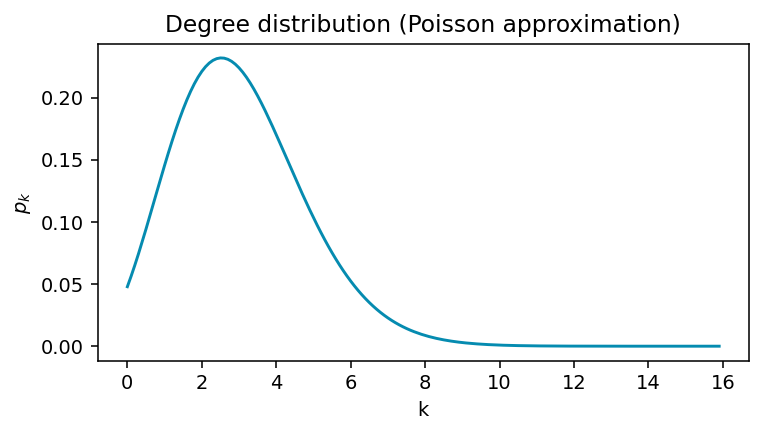

In [10]:
int_kcr = int(kcr)
pk = np.exp(-kcr)*(kcr**int_kcr/(factorial(int_kcr)))
print("Average distance <d>: ")
print(pk)
t = np.arange(0, 16, 0.1)
d = np.exp(-kcr)*np.power(kcr, t)/factorial(t)

plt.title("Degree distribution (Poisson approximation)")
plt.ylabel("$p_{k}$")
plt.xlabel("k")
plt.plot(t, d, color="#058bb0")
plt.show()

**Figure 4.** Degree distribution approximated with Poisson for an Erdős-Rényi network with N = 3000 nodes, connected to each other with probability p = 0.001

* Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
  * Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)
  * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
  * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
  * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

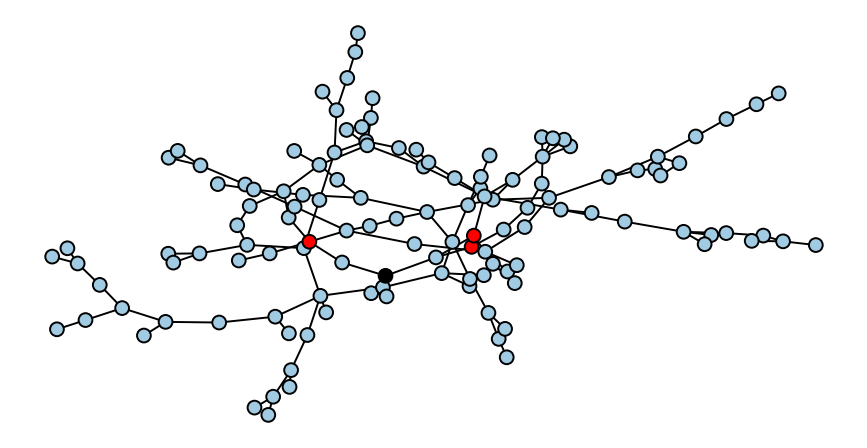

In [11]:
import matplotlib.pyplot as plt
import networkx as nx
import random


plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['figure.dpi'] = 140

n = 200
k = 1.5
p = k/(n-1)

G = nx.binomial_graph(n, p, seed=None, directed=False)

# Extract the giant component GCC
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
# print(list(G0))

# Extract random node
random_n = random.choice(list(G0.nodes()))
# print(random_n)

# Find nodes 2 steps away from random node
nodes_2_steps = nx.single_source_shortest_path_length(G, random_n, cutoff=None)
# print(nodes_2_steps)
nodes_2_steps = [k for k,v in nodes_2_steps.items() if v <= 2 & v > 0]
# print(nodes_2_steps)

# Plot graph
color_map = list()
for node in list(G0.nodes()):
  if node in nodes_2_steps:
    color_map.append("#ff0000")
  elif node == random_n:
    color_map.append("#000000")
  else:
    color_map.append("#A0CBE2")

nx.draw(G0, pos = nx.spring_layout(G0), node_color=color_map, node_size=50, 
        edgecolors="black", with_labels=False)

plt.show()

**Figure 5.** Random network with 200 nodes and an average degree of 1.5. Red nodes correspond to the neighbors within a distance of 2 from the black node

# Part 3: Watts-Strogatz Networks

* Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.

In [12]:
import networkx as nx
import matplotlib.pyplot as plt


n = 500
k = 4

p_1 = 0
G_ws_1 = nx.watts_strogatz_graph(n, k, p_1)
print(nx.average_shortest_path_length(G_ws_1))

p_2 = 0.1
G_ws_2 = nx.watts_strogatz_graph(n, k, p_2)
print(nx.average_shortest_path_length(G_ws_2))

p_3 = 1
G_ws_3 = nx.watts_strogatz_graph(n, k, p_3)
print(nx.average_shortest_path_length(G_ws_3))

62.875751503006015
7.737346693386773
4.738404809619238


* Describe what happens to the network when $p = 1$.
<i><font color='#00008B'>  
For p = 1 all links have been rewired, so the network turns into a random network.
</font></i>  

* Let's understand the behavior of the WS model as we increase _p_ in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).


![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ws.png)

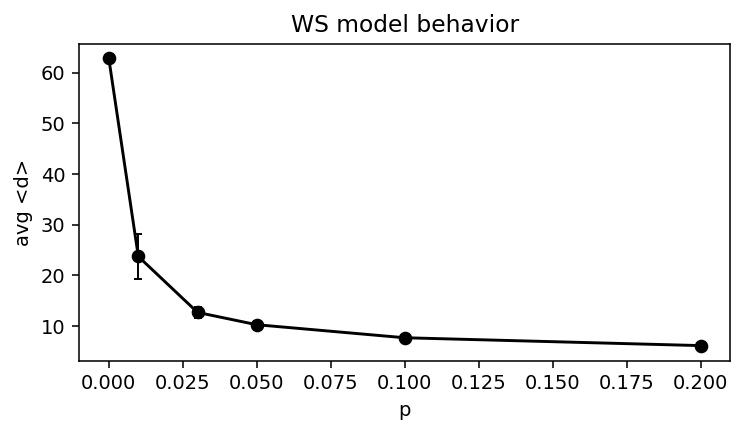

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['figure.dpi'] = 140

n = 500
k = 4

p_list = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
avg_d = list()
d_std = list()

# Calculate average and std of d
for p in p_list:
  G_ws_list = list()
  d_list = list()
  for i in range(50):
    G_ws_list.append(nx.watts_strogatz_graph(n, k, p))
    d_list.append(nx.average_shortest_path_length(G_ws_list[i]))

  avg_d.append(np.mean(d_list))
  d_std.append(np.std(d_list))

# Plot
plt.errorbar(p_list, avg_d, yerr=d_std, fmt='-o', color='black',
             ecolor='black', elinewidth=1, capsize=2)
plt.title("WS model behavior")
plt.ylabel("avg <d>")
plt.xlabel("p")
plt.show()

**Figure 6.** Evolution of the relation between the average distance and the probability for 50 Watts-Strogatz networks

# Part 4. The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success

* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.

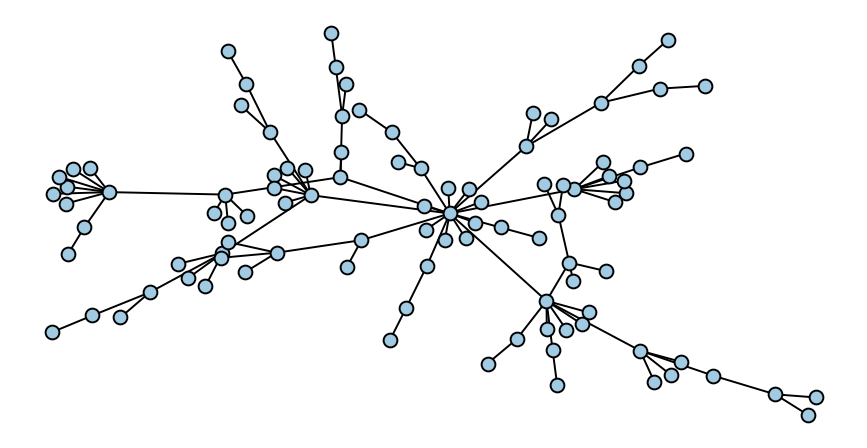

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
import operator
import random


plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['figure.dpi'] = 140

def barabasi_albert_model(n):
  # Add initial nodes
  G = nx.Graph()
  G.add_nodes_from([0, 1])
  G.add_edge(0,1)
  
  init_nodes = 2

  for i in range(init_nodes, n):
    links = reduce(operator.concat, G.edges)
    rand_item = links[random.randrange(len(links))]
    G.add_edge(i, rand_item)

  return G


# Create 100 node BA network
n = 100
G = barabasi_albert_model(n)

max_degree = max([d for n, d in G.degree()])

# Plot network
nx.draw(G, pos = nx.spring_layout(G), node_color="#A0CBE2", node_size=50, 
        edgecolors="black", with_labels=False)

plt.show()

**Figure 7.** Barabasi-Albert network with 100 nodes

* Now create a 5000 node network.
  * What's the maximum and minimum degree?
  * Now, bin the degree distribution, for example using `numpy.histogram`.
  * Plot the distribution. Plot it with both linear and log-log axes.

![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ba.png)

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import collections


n = 5000
G = barabasi_albert_model(n)

The minimum degree is: 
1
The maximum degree is: 
147


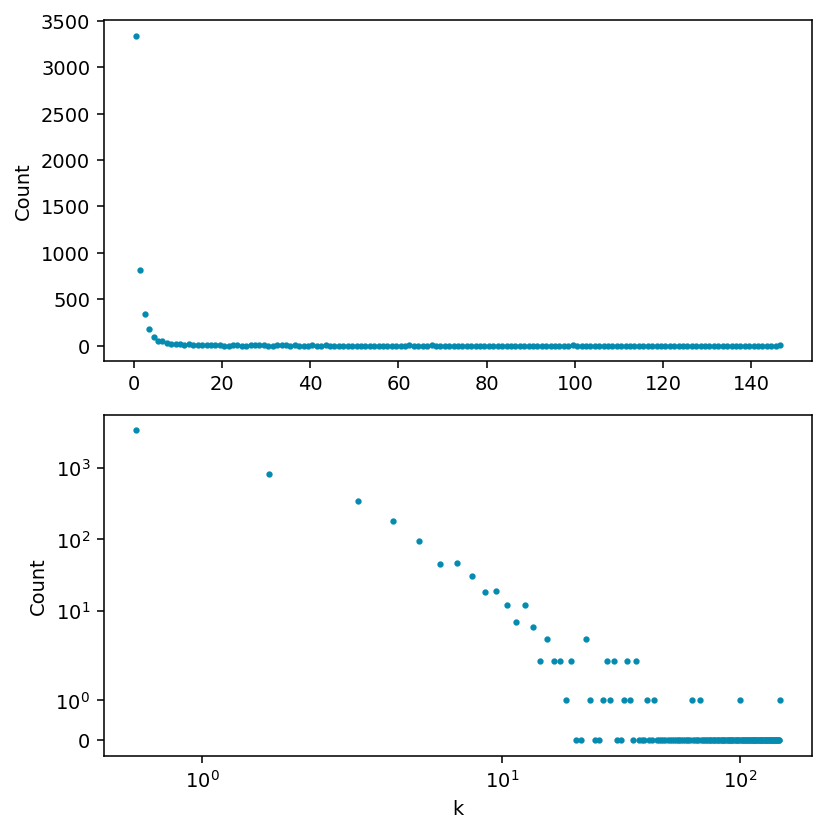

In [16]:
plt.rcParams['figure.figsize'] = (6, 6)
plt.rcParams['figure.dpi'] = 140

# Min and max degree
print("The minimum degree is: ")
min_degree = min([d for n, d in G.degree()])
print(min_degree)
print("The maximum degree is: ")
max_degree = max([d for n, d in G.degree()])
print(max_degree)

# Plot degree distribution
bins = np.arange(min_degree, max_degree+2)
hist, bins_plot = np.histogram([d for n, d in G.degree()], bins = bins - 1/2)

x = bins_plot[:-1]
y = hist

fig, ax = plt.subplots(2)
ax[0].scatter(x, y, color="#058bb0", s=5)
#ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
#ax[0].set_xlabel("Degree")

ax[1].scatter(x, y, color="#058bb0", s=5)
ax[1].set_xscale('symlog')
ax[1].set_yscale('symlog')
ax[1].set_xlabel("k")
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

**Figure 8.** Degree distribution with linear axes (top) and log-log axes (bottom)

# Part 5 Power-laws and the friendship paradox

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

* Pick a node _i_ at random (e.g. use `random.choice`). [Find its degree](http://networkx.lanl.gov/reference/generated/networkx.Graph.degree.html).
* Find _i_'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html). And calculate their average degree.
* Compare the two numbers to check if it's true that _i_'s friends (on average) have more friends than _i_.
* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. 

* Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.

* Pick a node _i_ at random (e.g. use `random.choice`). [Find its degree](http://networkx.lanl.gov/reference/generated/networkx.Graph.degree.html).

In [31]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from random import sample
import statistics as st


plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['figure.dpi'] = 140


rand_node = sample(list(G.nodes()), 1)
print("Node ", rand_node[0]," has ", G.degree(rand_node[0]), " friends.")

Node  465  has  4  friends.


* Find _i_'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html). And calculate their average degree.

In [32]:
list(G.neighbors(rand_node[0]))

[23, 719, 1386, 1561]

In [33]:
neighbors = list()

for n in list(G.neighbors(rand_node[0])):
    neighbors.append(G.degree(n))

neighbors_avg_k = st.mean(neighbors)
print("Neighbors average degree: ", neighbors_avg_k)

Neighbors average degree:  5.25


* Compare the two numbers to check if it's true that _i_'s friends (on average) have more friends than _i_.

In [34]:
print("Node ", rand_node[0], " has ", len(neighbors), " friends, who have on average ", neighbors_avg_k, " friends.")

Node  465  has  4  friends, who have on average  5.25  friends.


* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

In [35]:
main_nodes = list()
friends = list()

for n in range(1000):
    rand_node = random.choice(list(G.nodes()))
    main_nodes.append(G.degree(rand_node))
    neighbors = list()
    for n in list(G.neighbors(rand_node)):
        neighbors.append(G.degree(n))
    friends.append(st.mean(neighbors))

In [36]:
result = list()

for n in range(len(friends)):
    if main_nodes[n] < friends[n]:
        result.append("True")
    else:
        result.append("False")

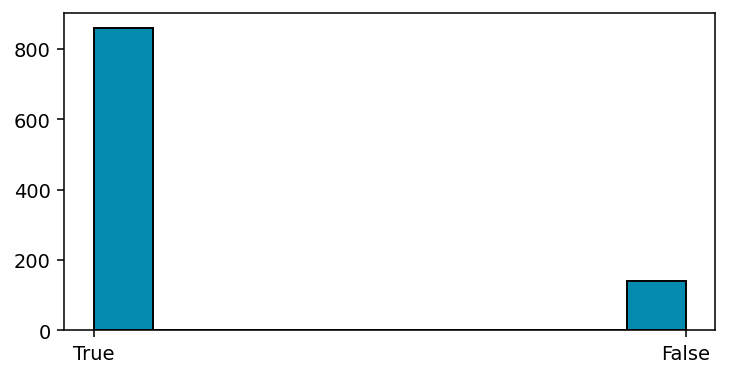

In [37]:
plt.hist(result, color="#058bb0", edgecolor="#000000")
plt.show()

**Figure 9.** Friendship paradox results over 1000 random nodes

In [38]:
trues = list()
for t in result:
    if t == "True":
        trues.append(t)

In [39]:
print("The percentage in which the Friendship paradox is true, is ", len(trues)/len(result)*100, "%")

The percentage in which the Friendship paradox is true, is  85.9 %


Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. 

* Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.

In [40]:
degrees = dict(list(G.degree()))
p = sum(degrees.values())/len(G.degree())/4999
ergraph = nx.erdos_renyi_graph(5000, p, seed=None, directed=False)

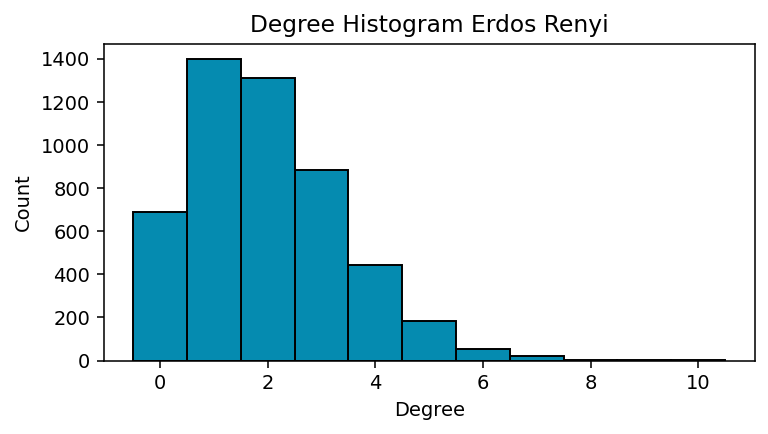

In [41]:
degree_sequence = sorted([d for n, d in ergraph.degree()], reverse=True)  # degree sequence
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=1, color="#058bb0", edgecolor="#000000")

plt.title("Degree Histogram Erdos Renyi")
plt.ylabel("Count")
plt.xlabel("Degree")

plt.show()

**Figure 10.** Degree histogram for an Erdos - Renyi network with n=5000 and p=0.0004

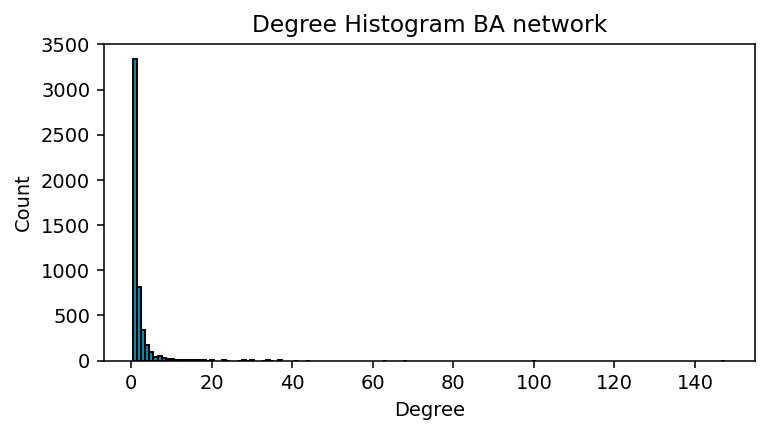

In [42]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=1, color="#058bb0", edgecolor="#000000")

plt.title("Degree Histogram BA network")
plt.ylabel("Count")
plt.xlabel("Degree")

plt.show()

**Figure 11.** Degree histogram for a Barabasi-Albert network with preferential attachement and n=5000, p=0.0004

In [43]:
ergraphxs = list(ergraph.subgraph(c) for c in nx.connected_components(ergraph))
ggraphxs = list(G.subgraph(c) for c in nx.connected_components(G))
print("Number of subgraphs in ER graph: ", len(ergraphxs), 
      "\nNumber of subgraphs in BA network: ", len(ggraphxs))


Number of subgraphs in ER graph:  813 
Number of subgraphs in BA network:  1


<i><font color='#00008B'>  
The difference is that when generating a ER graph, there are some independent nodes and networks and in the BA network that we generated there is just one graph. This is true because in the process of generating the BA network, every new node was connected to the initial growing link of two nodes while in the process of generating the ER graph, there are possibilities for a new node to form an independent network.
</font></i>